In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Perceptron

In [20]:
data_train = np.array([[0.0, 0.0],
                [1.0, 0.0],
                [0.0, 1.0],
                [1.0, 1.0],
                [1.0, 0.2],
                [0.6, 0.6]])

In [21]:
 target = np.array([0.0,0.0,0.0,1.0, 0.0, 1.0])

In [22]:
ppn = Perceptron(max_iter=4000, eta0=0.1, random_state=1)

In [23]:
ppn.fit(data_train, target)

Perceptron(eta0=0.1, max_iter=4000, random_state=1)

In [24]:
test_data = np.array([[0.0, 0.0],
                [0.1, 0.1],
                [0.2, 0.3],
                [0.8, 0.8],
                [0.6, 0.2],
                [0.3, 0.2],
                [0.7, 0.6],
                [0.5, 0.5],
                [0.55, 0.6]])

In [25]:
pred = ppn.predict(test_data)

In [26]:
Length = test_data.shape[0]
for i in range(0,Length):
    print("Input: ", test_data[i], "Klasse: ",pred[i])

Input:  [0. 0.] Klasse:  0.0
Input:  [0.1 0.1] Klasse:  0.0
Input:  [0.2 0.3] Klasse:  1.0
Input:  [0.8 0.8] Klasse:  1.0
Input:  [0.6 0.2] Klasse:  1.0
Input:  [0.3 0.2] Klasse:  1.0
Input:  [0.7 0.6] Klasse:  1.0
Input:  [0.5 0.5] Klasse:  1.0
Input:  [0.55 0.6 ] Klasse:  1.0


In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('x1')
    plt.ylabel('x2')

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

    plt.legend(loc='upper left')
    plt.show()

/tmp/ipykernel_2414/1904488273.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


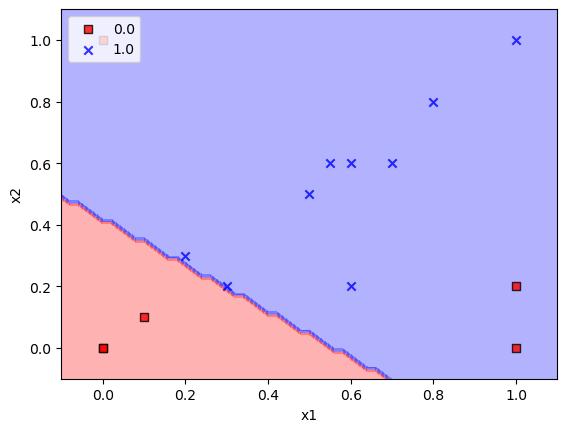

In [28]:
X_combined = np.vstack((data_train, test_data))
y_combined = np.hstack((target, pred))

plot_decision_regions(X=X_combined,y=y_combined,classifier=ppn)